In [39]:
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Initial Data Analysis

In [40]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = pd.DataFrame(wine_quality.data.original)
print(df)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

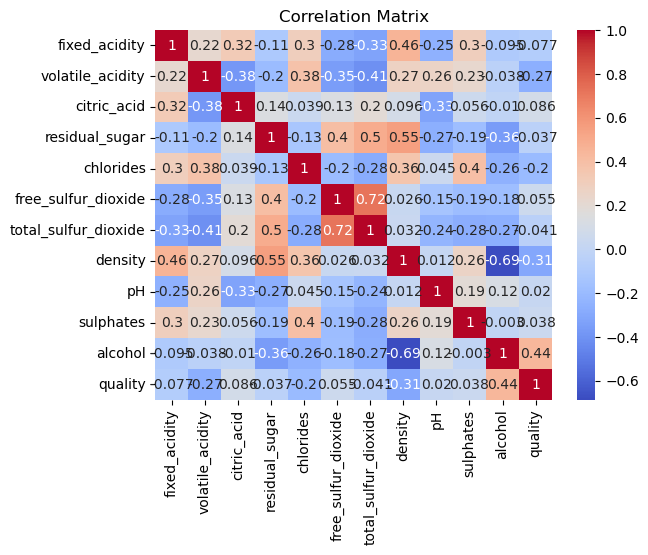

                 Feature  Importance
10               alcohol    0.250069
1       volatile_acidity    0.128318
5    free_sulfur_dioxide    0.089008
9              sulphates    0.077993
6   total_sulfur_dioxide    0.073539
3         residual_sugar    0.071269
8                     pH    0.067918
4              chlorides    0.066707
7                density    0.060255
2            citric_acid    0.058930
0          fixed_acidity    0.055995


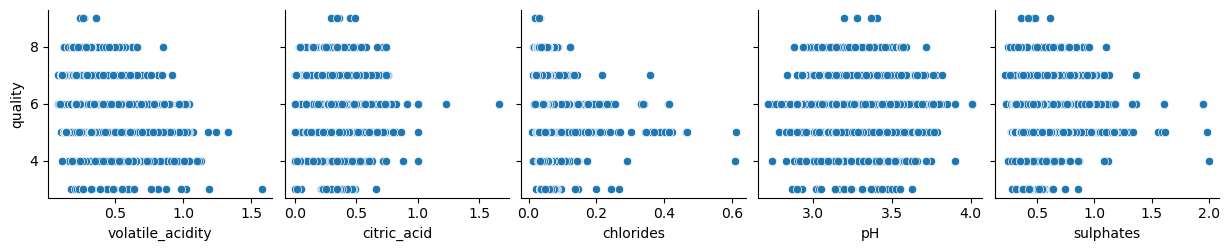

In [41]:
# correlation analysis
df1 = df.drop('color', axis=1)
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# feature importance
X = df1.drop('quality',axis=1)
y = df['quality']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_features)

# visualization
sns.pairplot(df1, x_vars=['volatile_acidity', 'citric_acid', 'chlorides', 'pH', 'sulphates'], y_vars=['quality'], kind='scatter')
plt.show()

In [47]:
X = df.drop(columns=['color', 'fixed_acidity', 'residual_sugar', 'citric_acid', 'chlorides', 'density', 'pH', 'sulphates', 'total_sulfur_dioxide', 'quality'],axis =1)
y = df['quality']
#check proper columns are selected
print(X)
print(y)

      volatile_acidity  free_sulfur_dioxide  alcohol
0                 0.70                 11.0      9.4
1                 0.88                 25.0      9.8
2                 0.76                 15.0      9.8
3                 0.28                 17.0      9.8
4                 0.70                 11.0      9.4
...                ...                  ...      ...
6492              0.21                 24.0     11.2
6493              0.32                 57.0      9.6
6494              0.24                 30.0      9.4
6495              0.29                 20.0     12.8
6496              0.21                 22.0     11.8

[6497 rows x 3 columns]
0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64


# Gradient Descent

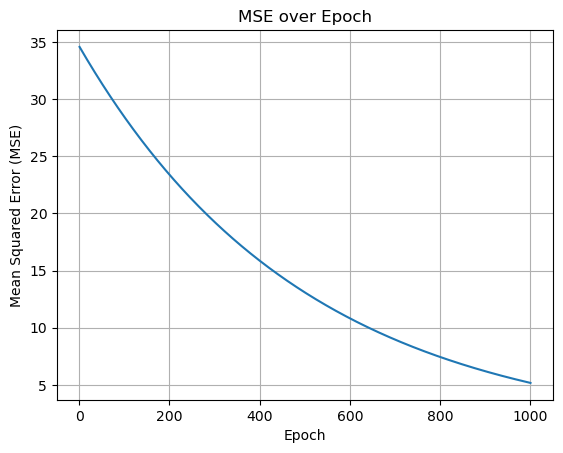

In [48]:
# Step 1: Prepare the Data
def prepare_data(X, y):
    """Split the data into training and testing sets and scale the features.

    Args:
        X (DataFrame): Features.
        y (Series): Target variable.

    Returns:
        X_train_scaled (array): Scaled training features.
        X_test_scaled (array): Scaled testing features.
        y_train (array): Training target variable.
        y_test (array): Testing target variable.
    """
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

    # Step 1.1: Scale the Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Step 2: Define the Model
class LinearRegressionGD:
    """Linear regression model trained using regular gradient descent."""

    def __init__(self):
        """Initialize the model."""
        self.weights = None
        self.bias = None
        self.mse_history = []

    def fit(self, X, y, learning_rate=0.001, epochs=1000):
        """Fit the model to the training data.

        Args:
            X (array): Training features.
            y (array): Training target variable.
            learning_rate (float, optional): Learning rate for gradient descent. Defaults to 0.01.
            epochs (int, optional): Number of training epochs. Defaults to 100.
        """
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            gradient = np.dot(X.T, error) / len(y)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            
            # Calculate MSE and store it for each epoch
            mse = mean_squared_error(y, y_pred)
            self.mse_history.append(mse)

    def predict(self, X):
        """Predict target variable for input features.

        Args:
            X (array): Input features.

        Returns:
            array: Predicted target variable.
        """
        return np.dot(X, self.weights) + self.bias

# Step 3: Train the Model
X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(X, y)
model_gd = LinearRegressionGD()
model_gd.fit(X_train_scaled, y_train, learning_rate=0.001, epochs=1000)

# Step 3.1: plot MSE over epoch
plt.plot(range(1, len(model_gd.mse_history) + 1), model_gd.mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Epoch')
plt.grid(True)
plt.show()

# Step 4: Predict using the Trained Model
y_pred_gd = model_gd.predict(X_test_scaled)

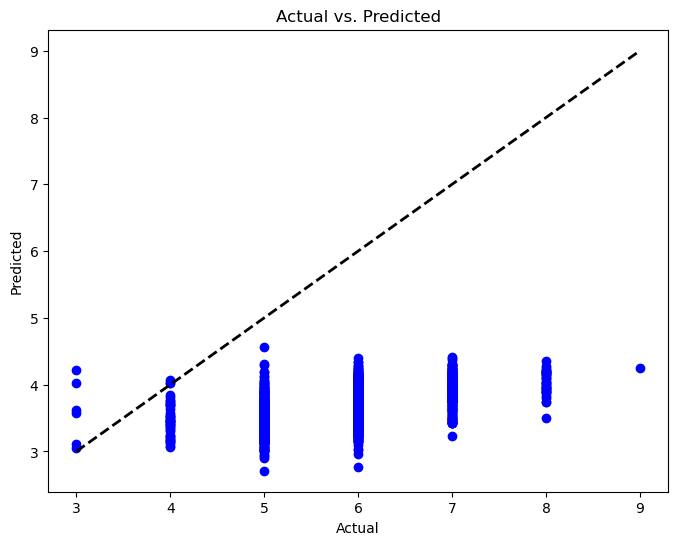

In [49]:
import matplotlib.pyplot as plt

# Visualize the Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [50]:
# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_gd)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gd)
r2 = r2_score(y_test, y_pred_gd)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5.234015790096357
Root Mean Squared Error (RMSE): 2.2877971479343087
Mean Absolute Error (MAE): 2.1651585033786676
R-squared (R2): -6.086911995140659


Overall, the statistics suggest that the model trained using regular gradient descent performs poorly in predicting the target variable. The high MSE, RMSE, and MAE values, along with the negative R-squared value, indicate significant errors and poor fit of the model to the data. Further analysis and improvements to the model may be necessary to achieve better performance.

# Stochastic Gradient Descent

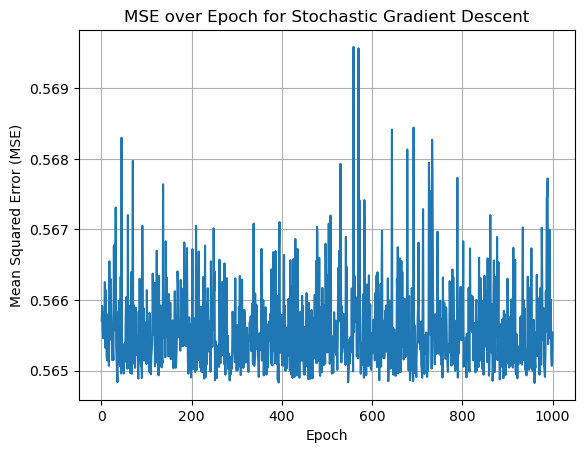

In [51]:
# Step 1: Prepare the Data
def prepare_data(X, y):
    """Split the data into training and testing sets and scale the features.

    Args:
        X (DataFrame): Features.
        y (Series): Target variable.

    Returns:
        X_train_scaled (array): Scaled training features.
        X_test_scaled (array): Scaled testing features.
        y_train (array): Training target variable.
        y_test (array): Testing target variable.
    """
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

    # Step 1.1: Scale the Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Step 2: Define the Model
class LinearRegressionSGD:
    """Linear regression model trained using stochastic gradient descent."""

    def __init__(self):
        """Initialize the model."""
        self.weights = None
        self.bias = None
        self.mse_history = []

    def fit(self, X, y, learning_rate=0.001, epochs=1000, batch_size=1):
        """Fit the model to the training data using stochastic gradient descent.

        Args:
            X (array): Training features.
            y (array): Training target variable.
            learning_rate (float, optional): Learning rate for gradient descent. Defaults to 0.001.
            epochs (int, optional): Number of training epochs. Defaults to 1000.
            batch_size (int, optional): Size of mini-batches. Defaults to 1.
        """
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(epochs):
            indexes = np.random.permutation(len(X))
            X_shuffled = X[indexes]
            y_shuffled = y[indexes]

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                y_pred = np.dot(X_batch, self.weights) + self.bias
                error = y_pred - y_batch
                gradient = np.dot(X_batch.T, error) / len(y_batch)
                self.weights -= learning_rate * gradient
                self.bias -= learning_rate * np.mean(error)
            
            # Calculate MSE and store it for each epoch
            y_pred_all = np.dot(X, self.weights) + self.bias
            mse = mean_squared_error(y, y_pred_all)
            self.mse_history.append(mse)

    def predict(self, X):
        """Predict target variable for input features.

        Args:
            X (array): Input features.

        Returns:
            array: Predicted target variable.
        """
        return np.dot(X, self.weights) + self.bias

# Step 3: Train the Model
X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(X, y)
model_sgd = LinearRegressionSGD()
model_sgd.fit(X_train_scaled, y_train, learning_rate=0.001, epochs=1000, batch_size=1)

# Setp 3.1: Plot MSE over epoch
plt.plot(range(1, len(model_sgd.mse_history) + 1), model_sgd.mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Epoch for Stochastic Gradient Descent')
plt.grid(True)
plt.show()

# Step 4: Predict using the Trained Model
y_pred_sgd = model_sgd.predict(X_test_scaled)

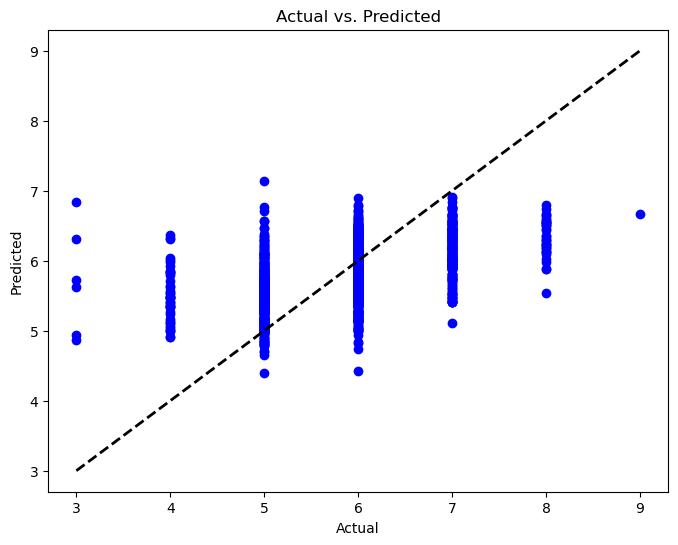

In [52]:
import matplotlib.pyplot as plt

# Visualize the Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sgd, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [53]:
# calculate Metrics
mse = mean_squared_error(y_test, y_pred_sgd)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.5558980946475337
Root Mean Squared Error (RMSE): 0.7455857393000042
Mean Absolute Error (MAE): 0.5798951044586326
R-squared (R2): 0.24730817922104187


Overall, these statistics indicate that the model performance is reasonable but not optimal. There is room for improvement, especially in terms of reducing prediction errors and increasing the explanatory power of the model. Further analysis and refinement of the model may be needed to achieve better performance.

# Conclusion

Comparisons suggest that the model trained using stochastic gradient descent performs better than the one trained using regular gradient descent in terms of prediction accuracy and model fit. The stochastic gradient descent model has lower errors and a slightly better ability to explain the variance in the target variable, as indicated by the less negative R-squared value.